# t-SNE 

## SNE

In [37]:
from csv import reader
from math import log,sqrt
from random import randrange, seed
from statistics import mode
import numpy as np
import matplotlib.pyplot as plt
import warnings
import time

In [113]:
def sqr_euclidean_distance(a,b):
    if isinstance(a, int) or isinstance(a, np.int32) or isinstance(a, float) or isinstance(a, np.float32):
        return (a - b)**2
    return sum([(xi - xj)**2 for xi,xj in zip(a,b)])

X = np.array([[1,2],
              [0,1],
              [5,6],
              [5,4]],dtype= np.float32)
Y =  np.array([1,3,-2,2],dtype=np.float32)

def pairwise_distance(X, i):
    # return dist(X[j], X[i]) for all j
    return np.array([sqr_euclidean_distance(X[i], X[j]) for j in range(0, len(X))])

def conditional_pji(X, i, sigmaSqr): # ~softmax
    # compute p_j|i for all j
    D = pairwise_distance(X, i)
    exp_vector = np.zeros(len(X))
    for j in range(len(X)):
        if j!=i:
            exp_vector[j] = np.exp(-D[j]/(2*sigmaSqr))
    return exp_vector/np.sum(exp_vector)

def joint_pij(X, i, sigmaSqr):
    # compute pij = (p_i|j + p_j|i) / (2*N) for all j
    N = len(X)
    pi = np.zeros(N)
    for j in range(N):
        if j!=i:
            p_i_given_j = conditional_pji(X, i, sigmaSqr)[j]
            p_j_given_i = conditional_pji(X, j, sigmaSqr)[i]
            pi[j]= (p_i_given_j + p_j_given_i) / (2 * N) # N: nums of examples
    return pi

def pairwise_distance_all(X):
    # all non-repetition pair_wise distance of X = [x1, x2, ... , xN]
    pair = []
    for i in range(0,len(X)-1):
        for j in range(i+1, len(X)):
            pair.append(sqr_euclidean_distance(X[i], X[j]))
    return np.array(pair)

def t_dist(D): # t-distribution with D = dist^2
    return  1/(1+D)

def denom_qij(Y):
    D_all = pairwise_distance_all(Y)
    prob_vector= t_dist(D_all)
    return (2*np.sum(prob_vector)) # 2 because of repetition

def joint_qij(Y, i, denom):
    # compute qij for all j
    D = pairwise_distance(Y, i)
    t_vector = t_dist(D)
    t_vector[i] = 0 # qii = 0
    return t_vector/denom

In [111]:
def plot(params, num_clusters): 
    colors = ['r','g','b','y','k']
    N = int(len(params)/num_clusters)
    for i in range(num_clusters):
        plt.scatter(params[N*i:N*(i+1)], params[N*i:N*(i+1)], c=colors[i % N])
    plt.show()
    
def gradient(X, Y, p, sigmaSqr = 3):
    N = len(X)
    grad = np.zeros(N)
    denom = denom_qij(Y) # <OVERLAPPED compute !!>
    for i in range(N):
        qi = joint_qij(Y, i, denom) # vector qi[0,1,...j]
        D = pairwise_distance(Y, i)
        t_vector = t_dist(D) # <OVERLAPPED compute !!>
        t_vector[i] = 0 #  qii = 0
        grad[i] = 4* np.sum((p[i] - qi)*(Y[i]-Y)*t_vector)
    return grad

def gradient_descent(X, Y, num_clusters, sigmaSqr = 3, num_iter=10, lr = 10): # Update params simultaneously
    N = len(X)
    params = Y
    p = [joint_pij(X, i, sigmaSqr) for i in range(N)] # vector pi[0,1,...j]
#     print(f'Iteration :{0}, params = \n{params}')
    plot(params, num_clusters)
    for i in range(num_iter):
        grad = gradient(X, params, p, sigmaSqr)
        params = params - lr*grad
        if i % 2 == 0:
            plot(params, num_clusters)
    #         print(f'Iteration :{i+1}, params = \n{params}')
    return params

def gradient_descent2(X, Y, sigmaSqr = 3, num_iter = 10, lr = 10): # Update params serially
    N = len(X)
    params = Y
    p = [join_pij(X, i, sigmaSqr) for i in range(N)] # vector pi[0,1,...j]
#     print(f'Iteration :{0}, params = \n{params}')
    for i in range(num_iter):
        for i in range(N):
            grad = gradient(X, params, p, sigmaSqr)
#             params = params - lr*grad
            params[i] = params[i] - lr*grad[i]
#         plot(params)
#         print(f'Iteration :{i+1}, params = \n{params}')
    return params

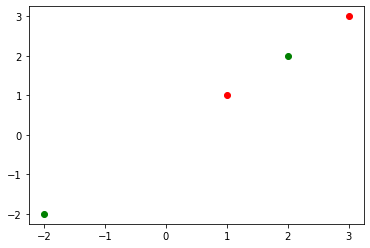

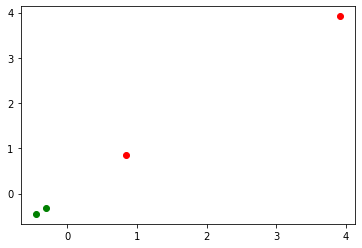

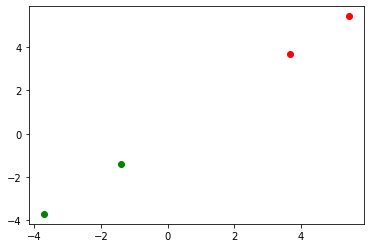

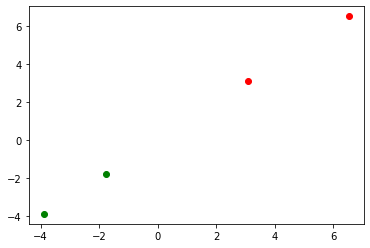

In [114]:
params = gradient_descent(X, Y, 2, sigmaSqr=3, num_iter=5)

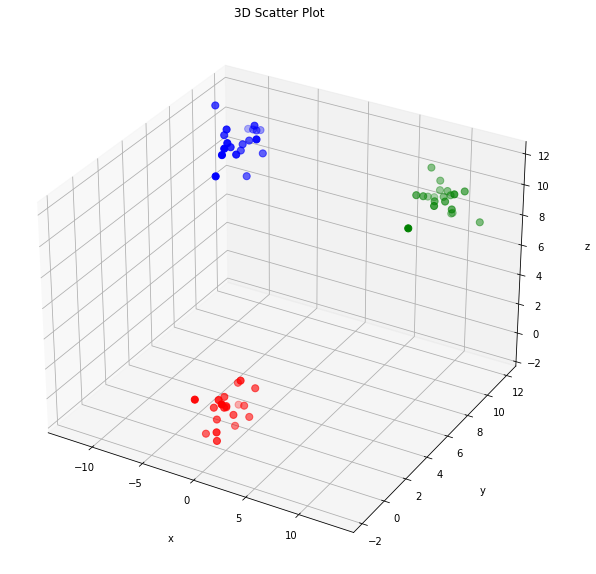

In [121]:
N = 20
mean1 = [0, 0, 0]
mean2 = [10, 10, 10]
mean3 = [-10, 10, 10]
cov = [[1, 0, 0], [0, 1, 0], [0,0,1]]
X1 = np.random.multivariate_normal(mean1, cov, N)
X2 = np.random.multivariate_normal(mean2, cov, N)
X3 = np.random.multivariate_normal(mean3, cov, N)

# Plot the high-dimensional data
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(X1[:, 0],X1[:, 1],X1[:, 2], c = 'r', s = 50)
ax.scatter(X2[:, 0],X2[:, 1],X2[:, 2], c = 'g', s = 50)
ax.scatter(X3[:, 0],X3[:, 1],X3[:, 2], c = 'b', s = 50)
ax.set_title('3D Scatter Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()

X = np.vstack((X1,X2,X3)) 
Y = np.random.normal(0, 1e-4, size = 3*N) # Std should be small enough (=1e-4 in original paper)

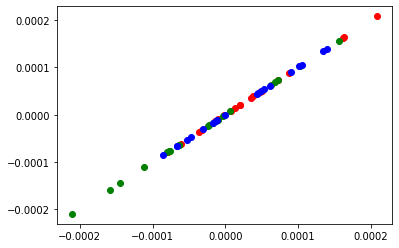

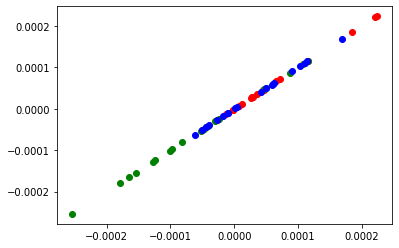

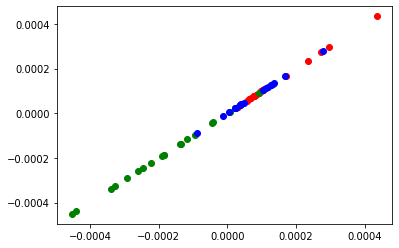

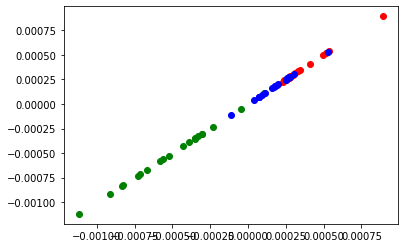

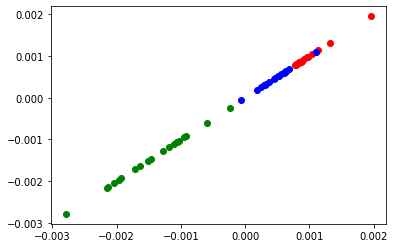

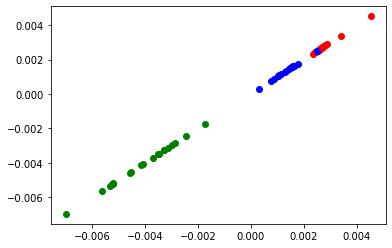

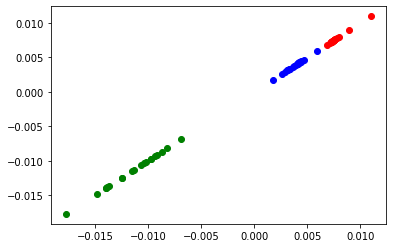

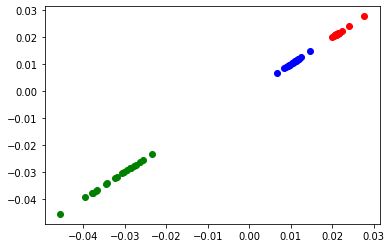

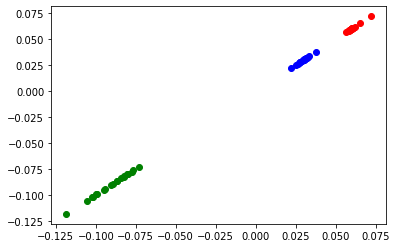

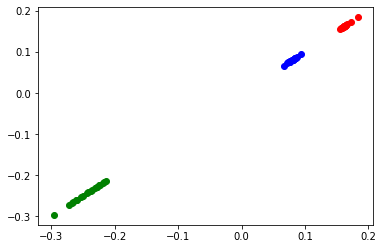

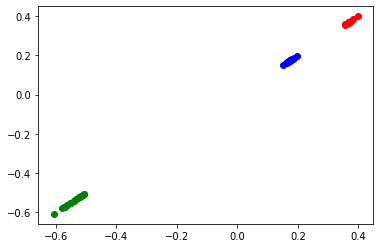

In [123]:
params = gradient_descent(X, Y, num_clusters=3,sigmaSqr=1, num_iter=20)

In [126]:
N = 20
mean1 = [0, 0, 0,0,0,0]
mean2 = [10, 10, 10,0,0,0]
mean3 = [-10, 10, 10,0,0,0]
mean4 = [0, 0, -10,0,0,0]
mean5 = [10, -10, 10,0,0,0]
mean6 = [-10, 10, -10,0,0,0]
cov = [[1, 0, 0, 0, 0, 0], 
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]]
X1 = np.random.multivariate_normal(mean1, cov, N)
X2 = np.random.multivariate_normal(mean2, cov, N)
X3 = np.random.multivariate_normal(mean3, cov, N)
X4 = np.random.multivariate_normal(mean4, cov, N)
X5 = np.random.multivariate_normal(mean5, cov, N)
X6 = np.random.multivariate_normal(mean6, cov, N)

X = np.vstack((X1,X2,X3)) 
Y = np.random.normal(0, 1e-4, size = 3*N) # Std should be small enough (=1e-4 in original paper)

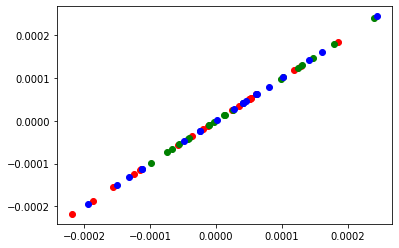

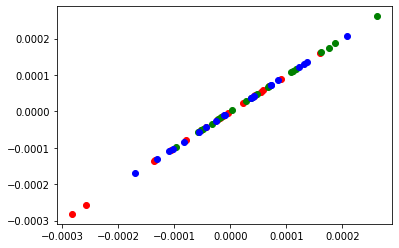

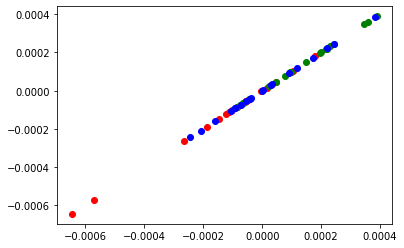

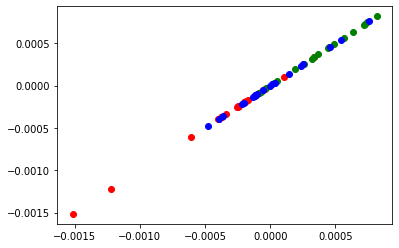

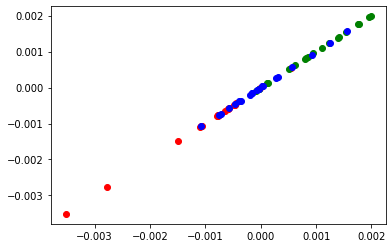

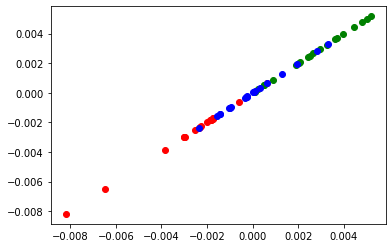

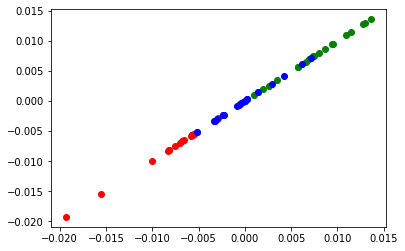

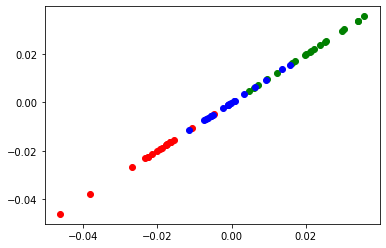

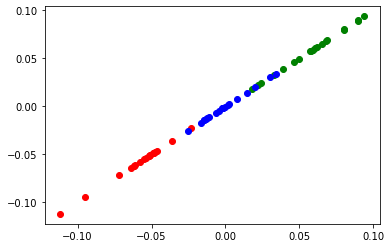

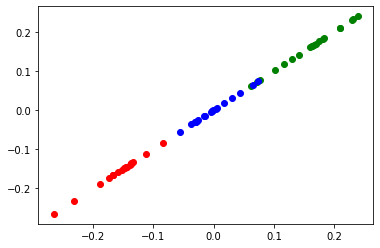

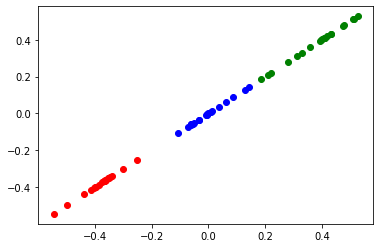

In [127]:
params = gradient_descent(X, Y, num_clusters=3,sigmaSqr=1, num_iter=20)

## Refs:
https://nlml.github.io/in-raw-numpy/in-raw-numpy-t-sne/